In [345]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert

In [346]:
########## directly measured quantities ##########
frequencyResponse_ChA = pd.read_csv("CSVs/Ch_A_Frequency_response.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
frequencyResponse_ChB = pd.read_csv("CSVs/Ch_B_Frequency_response.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
maxLevelVsFreq_ChA = pd.read_csv("CSVs/Ch_A_Max_level_vs_freq.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
maxLevelVsFreq_ChB = pd.read_csv("CSVs/Ch_B_Max_level_vs_freq.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
interChannelPhaseResponse = pd.read_csv("CSVs/Inter-channel_phase_response.csv", header=0, names=["Bin", "Freq", "Phase","None", "Comment"], encoding="utf_16_le")
thdnVsFrequencyAt_N1dBFS_ChA = pd.read_csv("CSVs/Ch_A_THD+N_vs_freq_at_-1_dBFS.csv", header=0, names=["Bin", "Freq", "THDN", "None", "Comment"], encoding="utf_16_le")
thdnVsFrequencyAt_N20dBFS_ChA = pd.read_csv("CSVs/Ch_A_THD+N_vs_freq_at_-20_dBFS.csv", header=0, names=["Bin", "Freq", "THDN", "None", "Comment"], encoding="utf_16_le")
thdnVsFrequencyAt_N1dBFS_ChB = pd.read_csv("CSVs/Ch_B_THD+N_vs_freq_at_-1_dBFS.csv", header=0, names=["Bin", "Freq", "THDN", "None", "Comment"], encoding="utf_16_le")
thdnVsFrequencyAt_N20dBFS_ChB = pd.read_csv("CSVs/Ch_B_THD+N_vs_freq_at_-20_dBFS.csv", header=0, names=["Bin", "Freq", "THDN", "None", "Comment"], encoding="utf_16_le")
thdnVsLevel_ChA = pd.read_csv("CSVs/Ch_A_THD+N_vs_level.csv", header=0, names=["Bin", "Lvl", "THDN", "None", "Comment"], encoding="utf_16_le")
thdnVsLevel_ChB = pd.read_csv("CSVs/Ch_B_THD+N_vs_level.csv", header=0, names=["Bin", "Lvl", "THDN", "None", "Comment"], encoding="utf_16_le")
gainNonLinearity_ChA = pd.read_csv("CSVs/Ch_A_Gain_non-linearity.csv", header=0, names=["Bin", "Lvl", "Mag", "None", "Comment"], encoding="utf_16_le")
gainNonLinearity_ChB = pd.read_csv("CSVs/Ch_B_Gain_non-linearity.csv", header=0, names=["Bin", "Lvl", "Mag", "None", "Comment"], encoding="utf_16_le")
idleChannelNoise_ChA = pd.read_csv("CSVs/Ch_A_Idle_channel_noise.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
idleChannelNoise_ChB = pd.read_csv("CSVs/Ch_B_Idle_channel_noise.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
lowLevelNoiseModulation_ChA = pd.read_csv("CSVs/Ch_A_Low-level_noise_modulation.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
lowLevelNoiseModulation_ChB = pd.read_csv("CSVs/Ch_B_Low-level_noise_modulation.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
crosstalkseperation_ChAfromB = pd.read_csv("CSVs/Ch_A_from_B_Crosstalkseparation.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
crosstalkseperation_ChBfromA = pd.read_csv("CSVs/Ch_B_from_A_Crosstalkseparation.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
inputToOutputLeakage_ChA = pd.read_csv("CSVs/Ch_A_Input-to-output_leakage.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
inputToOutputLeakage_ChB = pd.read_csv("CSVs/Ch_B_Input-to-output_leakage.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
attenuationOfAliasProducts_ChA = pd.read_csv("CSVs/Ch_A_Attenuation_of_alias_products.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
attenuationOfAliasProducts_ChB = pd.read_csv("CSVs/Ch_B_Attenuation_of_alias_products.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
attenuationOfImageProducts_ChA = pd.read_csv("CSVs/Ch_A_Attenuation_of_image_products.csv", header=0, names=["Bin", "Freq", "Mag", "None", "Comment"], encoding="utf_16_le")
attenuationOfImageProducts_ChB = pd.read_csv("CSVs/Ch_B_Attenuation_of_image_products.csv", header=0, names=["Bin", "Freq", "Mag", "None"," Comment"], encoding="utf_16_le")
bodePlotDelayCompensated_ChA = pd.read_csv("CSVs/Ch_A_Input-to-output_phase_response.csv", header=0, names=["Freq","Ch1Mag","Ch1THDN","Ch2Mag","Ch2THDN","Phase"], skip_blank_lines=True, comment="#")
bodePlot20To20k_ChA = pd.read_csv("CSVs/Ch_A_Bode_plot_20To20k.csv", header=0, names=["Freq","Ch1Mag","Ch2Mag","Phase"], skip_blank_lines=True, comment="#")
bodePlot20To20k_ChB = pd.read_csv("CSVs/Ch_B_Bode_plot_20To20k.csv", header=0, names=["Freq","Ch1Mag","Ch2Mag","Phase"], skip_blank_lines=True, comment="#")

In [347]:
def remove_spikes(data, start_index, end_index, threshold=3):
    """
    Remove spikes from a specified portion of an array of data.

    Parameters:
        data (list or numpy.ndarray): The input array of data.
        start_index (int): The starting index of the portion to consider.
        end_index (int): The ending index of the portion to consider.
        threshold (float): The threshold for considering a value as a spike. Default is 3.

    Returns:
        list: The array with spikes removed in the specified portion.
    """
    import numpy as np

    # Convert data to numpy array
    data = np.array(data)

    # Copy data to avoid modifying original array
    filtered_data = data.copy()

    # Calculate mean and standard deviation of the specified portion of the data
    portion_data = data[start_index:end_index+1]
    mean_value = np.mean(portion_data)
    std_value = np.std(portion_data)

    # Find indices of spikes in the specified portion
    spike_indices = np.where(np.abs(portion_data - mean_value) >= threshold * std_value)[0]

    # Replace spikes with interpolated values in the specified portion
    for spike_index in spike_indices:
        # Find neighboring non-spike values
        left_index = spike_index - 1
        right_index = spike_index + 1
        while left_index in spike_indices:
            left_index -= 1
        while right_index in spike_indices:
            right_index += 1

        # Perform linear interpolation
        left_value = portion_data[left_index]
        right_value = portion_data[right_index]
        interpolated_value = (left_value + right_value) / 2

        # Replace spike with interpolated value
        filtered_data[start_index + spike_index] = interpolated_value

    return filtered_data.tolist()

def smooth_data(data, window_size=3):
    """
    Smooth noisy data using moving average smoothing.

    Parameters:
        data (list or numpy.ndarray): The input array of noisy data.
        window_size (int): The size of the moving average window. Default is 3.

    Returns:
        list: The array with smoothed data.
    """

    # Convert data to numpy array
    data = np.array(data)

    # Initialize smoothed data array
    smoothed_data = np.zeros_like(data)

    # Apply moving average smoothing
    for i in range(len(data)):
        window_start = max(0, i - window_size + 1)
        window_end = min(len(data), i + 1)
        smoothed_data[i] = np.mean(data[window_start:window_end])

    return smoothed_data.tolist()

In [348]:
def compute_delay_and_minimum_phase(phase, frequencies):
    """
    Compute delay and minimum phase response given phase and corresponding frequencies.
    """
    # Convert phase from degrees to radians
    phase_radians = np.deg2rad(phase)

    # Unwrap the phase to remove discontinuities
    unwrapped_phase = np.unwrap(phase_radians)

    # Fit a linear function to unwrapped phase vs. frequency
    linear_fit = np.polyfit(frequencies, unwrapped_phase, 1)
    linear_phase = np.polyval(linear_fit, frequencies)

    # Subtract linear phase component
    non_linear_phase = unwrapped_phase - linear_phase

    # Compute delay as the negative slope of linear fit divided by 2*pi
    delay = -linear_fit[0] / (2 * np.pi)

    # Compute minimum phase response using Hilbert transform
    hilbert_transform = hilbert(non_linear_phase)
    minimum_phase = np.unwrap(np.angle(hilbert_transform))

    return delay, np.rad2deg(minimum_phase)



In [349]:
########## Quantities computed from measurements ##########
gainMatching = frequencyResponse_ChA.Mag - frequencyResponse_ChB.Mag

thdnVsFrequencyAt_N20dBFS_ChA.THDN = 20 * np.log10(thdnVsFrequencyAt_N20dBFS_ChA.THDN/100)
thdnVsFrequencyAt_N20dBFS_ChB.THDN = 20 * np.log10(thdnVsFrequencyAt_N20dBFS_ChB.THDN/100)
thdnVsFrequencyAt_N1dBFS_ChA.THDN = 20 * np.log10(thdnVsFrequencyAt_N1dBFS_ChA.THDN/100)
thdnVsFrequencyAt_N1dBFS_ChB.THDN = 20 * np.log10(thdnVsFrequencyAt_N1dBFS_ChB.THDN/100)
thdnVsLevel_ChA.THDN = 20 * np.log10(thdnVsLevel_ChA.THDN/100)
thdnVsLevel_ChB.THDN = 20 * np.log10(thdnVsLevel_ChB.THDN/100)

groupDelay_ChA_Freq = bodePlot20To20k_ChA.Freq
groupDelay_ChA = np.unwrap(bodePlot20To20k_ChA.Phase)
groupDelay_ChA = -np.gradient(groupDelay_ChA, bodePlot20To20k_ChA.Freq * 360) * 1000
for i in range (17):
    groupDelay_ChA[i] = 3
groupDelay_ChA = remove_spikes(groupDelay_ChA,start_index=0, end_index=14001, threshold=7)
groupDelay_ChA = remove_spikes(groupDelay_ChA,start_index=2000, end_index=14001, threshold=3)
groupDelay_ChA = smooth_data(groupDelay_ChA, window_size=300)

groupDelay_ChB_Freq = bodePlot20To20k_ChB.Freq
groupDelay_ChB = np.unwrap(bodePlot20To20k_ChB.Phase)
groupDelay_ChB = -np.gradient(groupDelay_ChB, bodePlot20To20k_ChB.Freq * 360) * 1000
for i in range (17):
    groupDelay_ChB[i] = 3.5
groupDelay_ChB = remove_spikes(groupDelay_ChB,start_index=0, end_index=14001, threshold=10)
groupDelay_ChB = remove_spikes(groupDelay_ChB,start_index=2000, end_index=14001, threshold=3)
groupDelay_ChB = smooth_data(groupDelay_ChB, window_size=300)

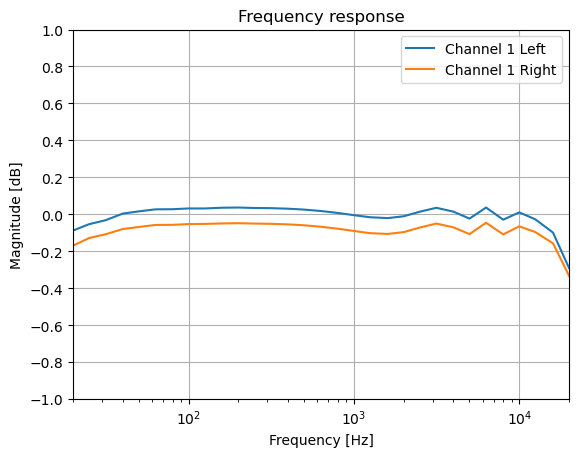

In [350]:
plt.figure()
plt.semilogx(frequencyResponse_ChA.Freq, frequencyResponse_ChA.Mag, label="Channel 1 Left")
plt.semilogx(frequencyResponse_ChB.Freq, frequencyResponse_ChB.Mag, label="Channel 1 Right")
plt.title("Frequency response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.xlim(20,20000)
plt.ylim(-1,1)
plt.legend()
plt.grid()
plt.yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
plt.savefig("PDFs/FrequencyResponse.pdf", format="pdf")
plt.show()

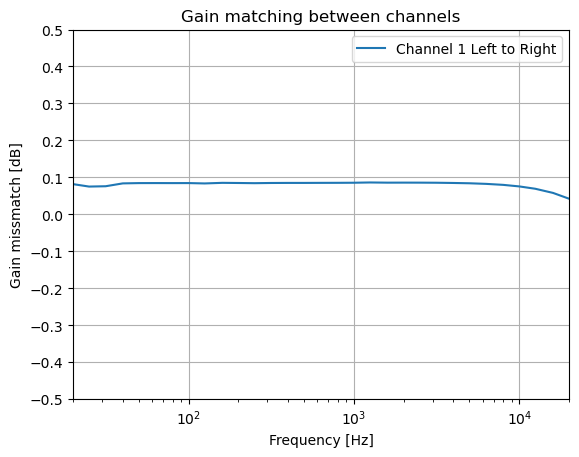

In [351]:
plt.figure()
plt.semilogx(frequencyResponse_ChA.Freq, gainMatching, label="Channel 1 Left to Right")
plt.title("Gain matching between channels")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain missmatch [dB]")
plt.xlim(20,20000)
plt.ylim(-0.5,0.5)
plt.legend()
plt.grid()
plt.yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.savefig("PDFs/GainMatching.pdf", format="pdf")
plt.show()

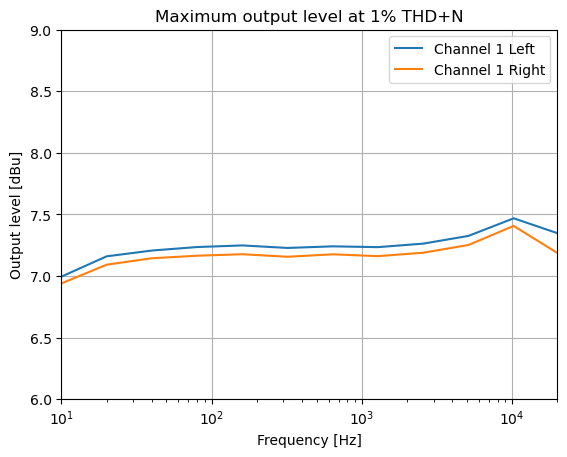

In [352]:
plt.figure()
plt.semilogx(maxLevelVsFreq_ChA.Freq, maxLevelVsFreq_ChA.Mag, label="Channel 1 Left")
plt.semilogx(maxLevelVsFreq_ChB.Freq, maxLevelVsFreq_ChB.Mag, label="Channel 1 Right")
plt.title("Maximum output level at 1% THD+N")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Output level [dBu]")
plt.xlim(10,20000)
plt.ylim(6,9)
plt.legend()
plt.grid()
plt.savefig("PDFs/MaxLevelVsFrequency.pdf", format="pdf")
plt.show()

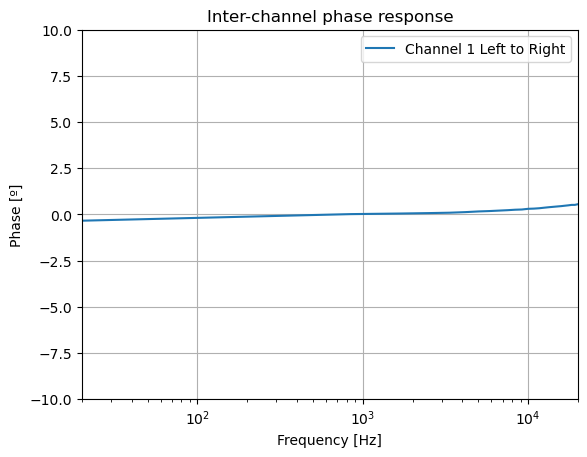

In [353]:
plt.figure()
plt.semilogx(interChannelPhaseResponse.Freq, interChannelPhaseResponse.Phase, label="Channel 1 Left to Right")
plt.title("Inter-channel phase response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [º]")
plt.xlim(20,20000)
plt.ylim(-10,10)
plt.legend()
plt.grid()
plt.savefig("PDFs/InterChannelPhaseResponse.pdf", format="pdf")
plt.show()

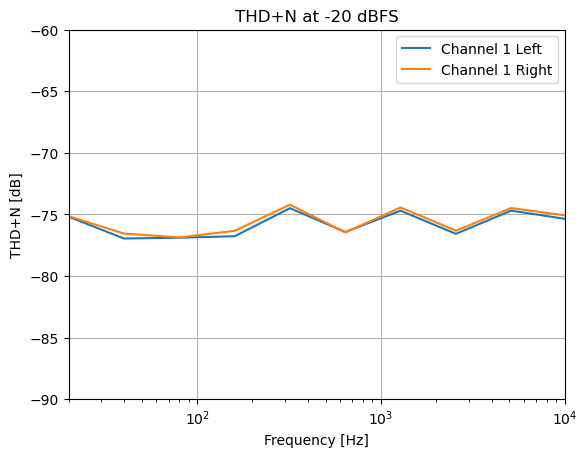

In [354]:
plt.figure()
plt.semilogx(thdnVsFrequencyAt_N20dBFS_ChA.Freq, thdnVsFrequencyAt_N20dBFS_ChA.THDN, label="Channel 1 Left")
plt.semilogx(thdnVsFrequencyAt_N20dBFS_ChB.Freq, thdnVsFrequencyAt_N20dBFS_ChB.THDN, label="Channel 1 Right")
plt.title("THD+N at -20 dBFS")
plt.xlabel("Frequency [Hz]")
plt.ylabel("THD+N [dB]")
plt.xlim(20,10000)
plt.ylim(-90,-60)
plt.legend()
plt.grid()
plt.savefig("PDFs/THD+NVsFrequencyAt-20dBFS.pdf", format="pdf")
plt.show()

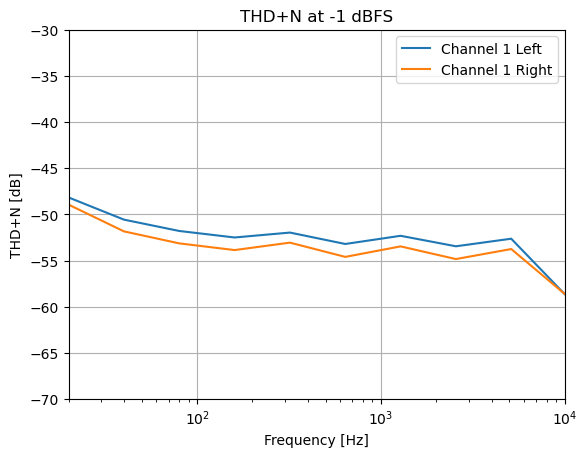

In [355]:
plt.figure()
plt.semilogx(thdnVsFrequencyAt_N1dBFS_ChA.Freq, thdnVsFrequencyAt_N1dBFS_ChA.THDN, label="Channel 1 Left")
plt.semilogx(thdnVsFrequencyAt_N1dBFS_ChB.Freq, thdnVsFrequencyAt_N1dBFS_ChB.THDN, label="Channel 1 Right")
plt.title("THD+N at -1 dBFS")
plt.xlabel("Frequency [Hz]")
plt.ylabel("THD+N [dB]")
plt.xlim(20,10000)
plt.ylim(-70,-30)
plt.legend()
plt.grid()
plt.savefig("PDFs/THD+NVsFrequencyAt-1dBFS.pdf", format="pdf")
plt.show()

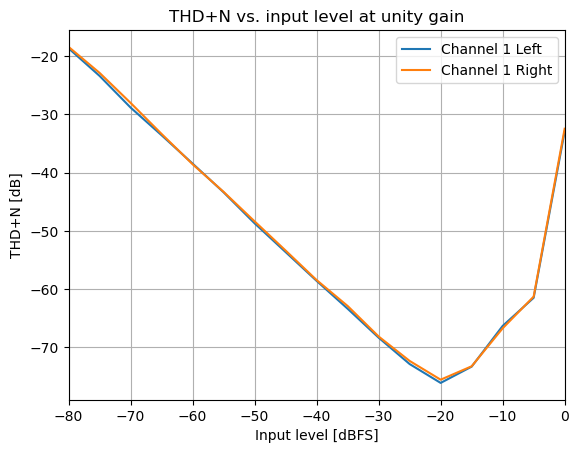

In [356]:
plt.figure()
plt.plot(thdnVsLevel_ChA.Lvl, thdnVsLevel_ChA.THDN, label="Channel 1 Left")
plt.plot(thdnVsLevel_ChB.Lvl, thdnVsLevel_ChB.THDN, label="Channel 1 Right")
plt.title("THD+N vs. input level at unity gain")
plt.xlabel("Input level [dBFS]")
plt.ylabel("THD+N [dB]")
plt.xlim(-80,0)
plt.legend()
plt.grid()
plt.savefig("PDFs/THD+NVsLevel.pdf", format="pdf")
plt.show()

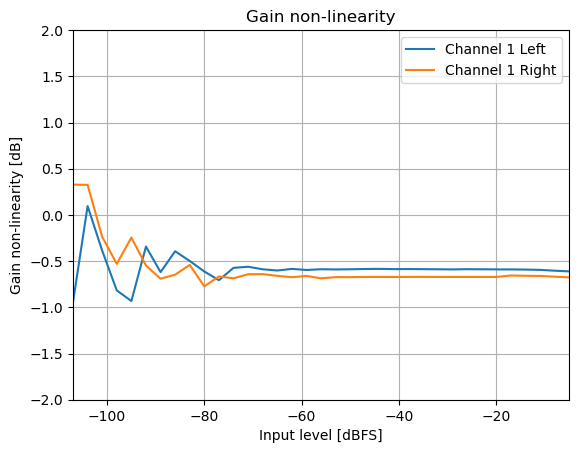

In [357]:
plt.figure()
plt.plot(gainNonLinearity_ChA.Lvl, gainNonLinearity_ChA.Mag, label="Channel 1 Left")
plt.plot(gainNonLinearity_ChB.Lvl, gainNonLinearity_ChB.Mag, label="Channel 1 Right")
plt.title("Gain non-linearity")
plt.xlabel("Input level [dBFS]")
plt.ylabel("Gain non-linearity [dB]")
plt.xlim(-107,-5)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.savefig("PDFs/GainNonLinearity.pdf", format="pdf")
plt.show()

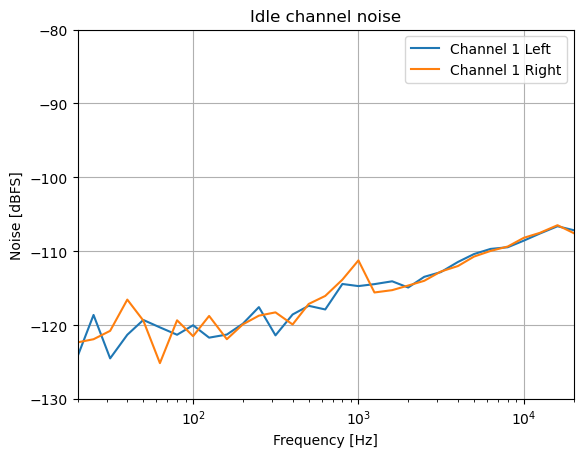

In [358]:
plt.figure()
plt.semilogx(idleChannelNoise_ChA.Freq, idleChannelNoise_ChA.Mag, label="Channel 1 Left")
plt.semilogx(idleChannelNoise_ChB.Freq, idleChannelNoise_ChB.Mag, label="Channel 1 Right")
plt.title("Idle channel noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Noise [dBFS]")
plt.xlim(20,20000)
plt.ylim(-130,-80)
plt.legend()
plt.grid()
plt.savefig("PDFs/IdleChannelNoise.pdf", format="pdf")
plt.show()

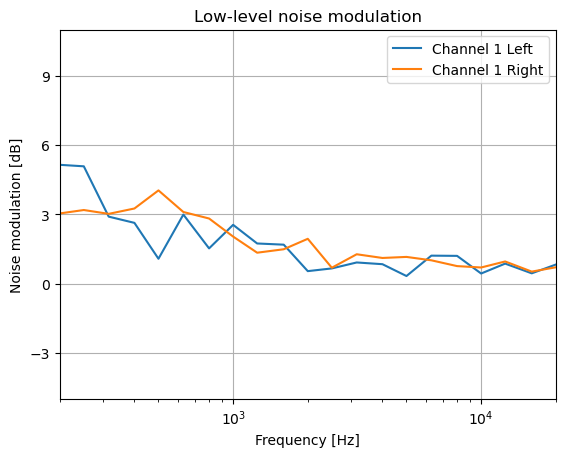

In [359]:
plt.figure()
plt.semilogx(lowLevelNoiseModulation_ChA.Freq, lowLevelNoiseModulation_ChA.Mag, label="Channel 1 Left")
plt.semilogx(lowLevelNoiseModulation_ChB.Freq, lowLevelNoiseModulation_ChB.Mag, label="Channel 1 Right")
plt.title("Low-level noise modulation")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Noise modulation [dB]")
plt.xlim(200,20000)
plt.ylim(-5,11)
plt.yticks([-3, 0, 3, 6, 9])
plt.legend()
plt.grid()
plt.savefig("PDFs/LowLevelNoiseModulation.pdf", format="pdf")
plt.show()

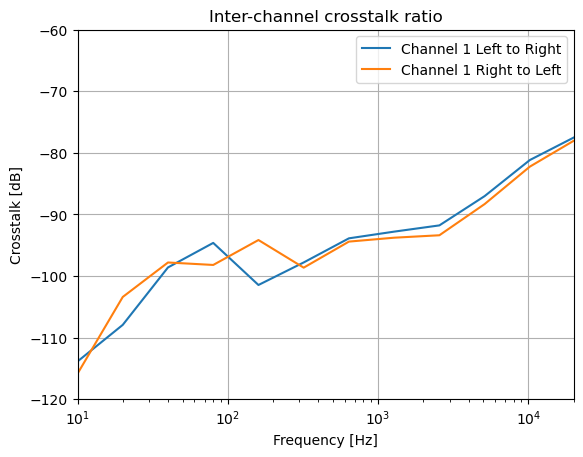

In [360]:
plt.figure()
plt.semilogx(crosstalkseperation_ChAfromB.Freq, crosstalkseperation_ChAfromB.Mag, label="Channel 1 Left to Right")
plt.semilogx(crosstalkseperation_ChBfromA.Freq, crosstalkseperation_ChBfromA.Mag, label="Channel 1 Right to Left")
plt.title("Inter-channel crosstalk ratio")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Crosstalk [dB]")
plt.xlim(10,20000)
plt.ylim(-120,-60)
plt.legend()
plt.grid()
plt.savefig("PDFs/InterChannelCrosstalk.pdf", format="pdf")
plt.show()

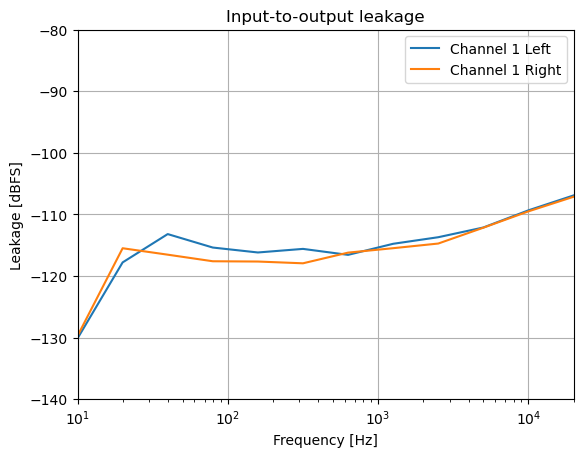

In [361]:
plt.figure()
plt.semilogx(inputToOutputLeakage_ChA.Freq, inputToOutputLeakage_ChA.Mag, label="Channel 1 Left")
plt.semilogx(inputToOutputLeakage_ChB.Freq, inputToOutputLeakage_ChB.Mag, label="Channel 1 Right")
plt.title("Input-to-output leakage")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Leakage [dBFS]")
plt.xlim(10,20000)
plt.ylim(-140,-80)
plt.legend()
plt.grid()
plt.savefig("PDFs/InputToOutputLeakage.pdf", format="pdf")
plt.show()

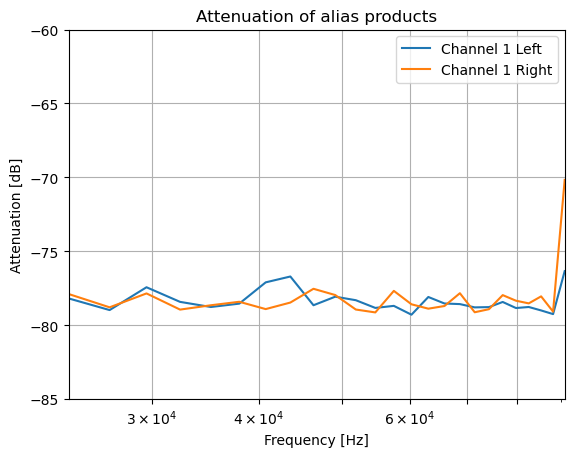

In [362]:
plt.figure()
plt.semilogx(attenuationOfAliasProducts_ChA.Freq, attenuationOfAliasProducts_ChA.Mag, label="Channel 1 Left")
plt.semilogx(attenuationOfAliasProducts_ChB.Freq, attenuationOfAliasProducts_ChB.Mag, label="Channel 1 Right")
plt.title("Attenuation of alias products")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Attenuation [dB]")
plt.xlim(24000,91000)
plt.ylim(-85,-60)
plt.xticks([30000, 40000, 50000, 60000, 70000, 80000])
plt.legend()
plt.grid()
plt.savefig("PDFs/AttenuationOfAliasProducts.pdf", format="pdf")
plt.show()

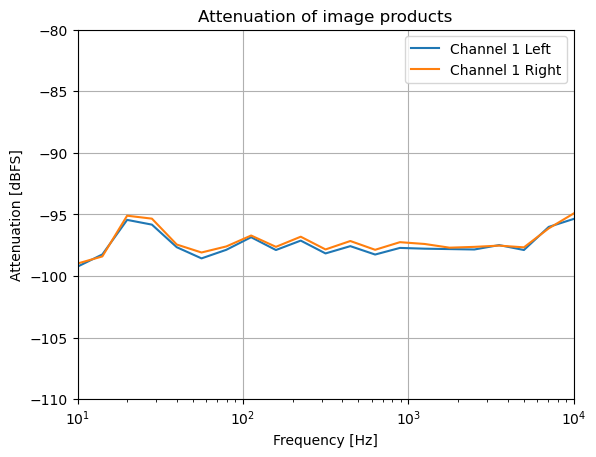

In [363]:
plt.figure()
plt.semilogx(attenuationOfImageProducts_ChA.Freq, attenuationOfImageProducts_ChA.Mag, label="Channel 1 Left")
plt.semilogx(attenuationOfImageProducts_ChB.Freq, attenuationOfImageProducts_ChB.Mag, label="Channel 1 Right")
plt.title("Attenuation of image products")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Attenuation [dBFS]")
plt.xlim(10,10000)
plt.ylim(-110,-80)
plt.legend()
plt.grid()
plt.savefig("PDFs/AttenuationOfImageProducts.pdf", format="pdf")
plt.show()

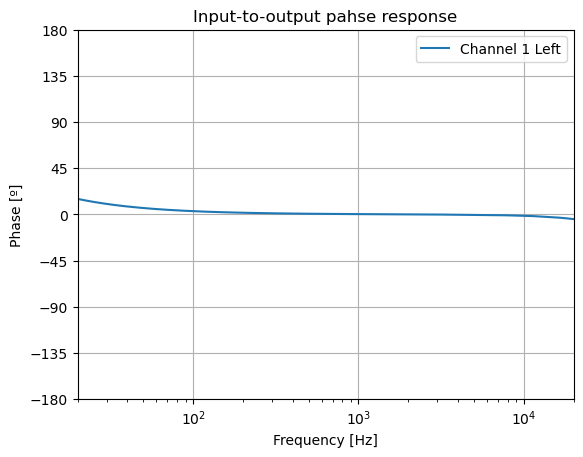

In [364]:
plt.figure()
plt.semilogx(bodePlotDelayCompensated_ChA.Freq, bodePlotDelayCompensated_ChA.Phase, label="Channel 1 Left")
#plt.semilogx(bodePlotDelayCompensated_ChB.Freq, bodePlotDelayCompensated_ChB.Phase, label="Channel 1 Right")
plt.title("Input-to-output pahse response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [º]")
plt.xlim(20,20000)
plt.ylim(-180,180)
plt.yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
plt.legend()
plt.grid()
#plt.savefig("PDFs/InputToOutputPhaseResponse.pdf", format="pdf")
plt.show()

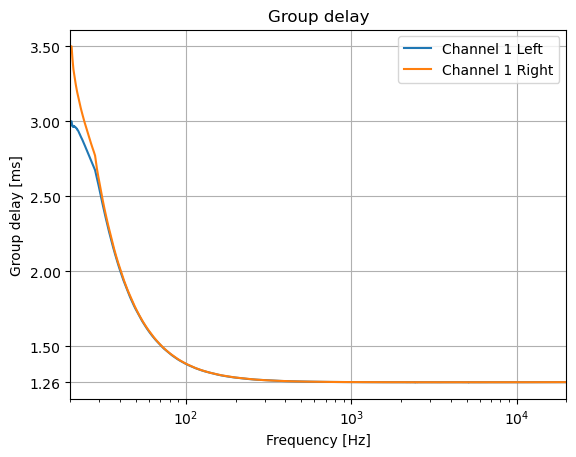

In [365]:
plt.figure()
plt.semilogx(groupDelay_ChA_Freq, groupDelay_ChA, label="Channel 1 Left")
plt.semilogx(groupDelay_ChB_Freq, groupDelay_ChB, label="Channel 1 Right")
plt.title("Group delay")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Group delay [ms]")
plt.xlim(20,20000)
plt.yticks([1.26,1.5, 2, 2.5, 3, 3.5])
plt.legend()
plt.grid()
plt.savefig("PDFs/GroupDelay.pdf", format="pdf")
plt.show()